# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
 % matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.stats import t, norm
#Read in the files

df = pd.read_csv('../data/human_body_temperature.csv')

### Exploratory Data Analysis

In [2]:
# Let us take a look at the tempareture
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
(rows,cols) = df.shape
print("There are a total of {} observations in the data set ".format(rows))

There are a total of 130 observations in the data set 


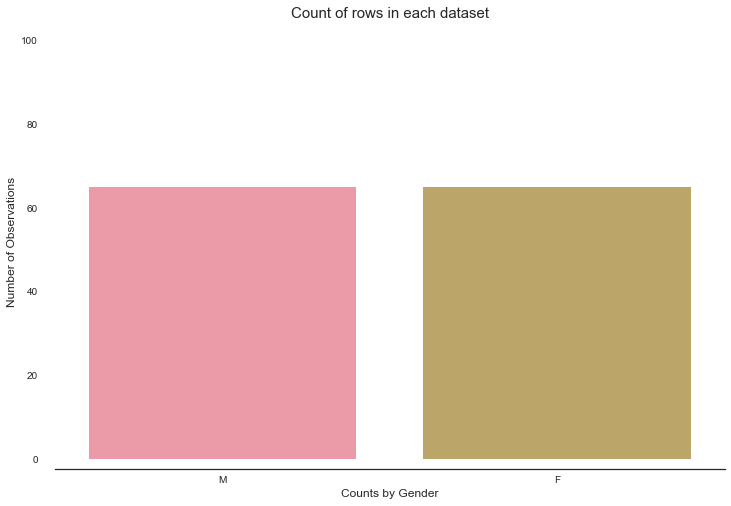

In [4]:
color = sns.color_palette()
sns.set(style="white")
cnt_srs = df.gender.value_counts()

plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
 sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Observations', fontsize=12)
plt.xlabel('Counts by Gender', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
sns.set_style("whitegrid")
sns.despine(offset=10)
sns.despine(left=True)

plt.margins(0.6)

plt.show()

Fig1 : (above) There are a total of 130 observations that seem evenly split between M and F genders

In [5]:
mean_ht_all = np.mean(df.temperature)
df.head()
males_df = df[df['gender'] == 'M']
females_df = df[df['gender'] == 'F']

print("The mean human temperature  of males in the data set is {}".format(np.mean(males_df['temperature'])))
print("The mean human temperature  of females in the data set is {}".format(np.mean(females_df['temperature'])))

The mean human temperature  of males in the data set is 98.1046153846154
The mean human temperature  of females in the data set is 98.39384615384613


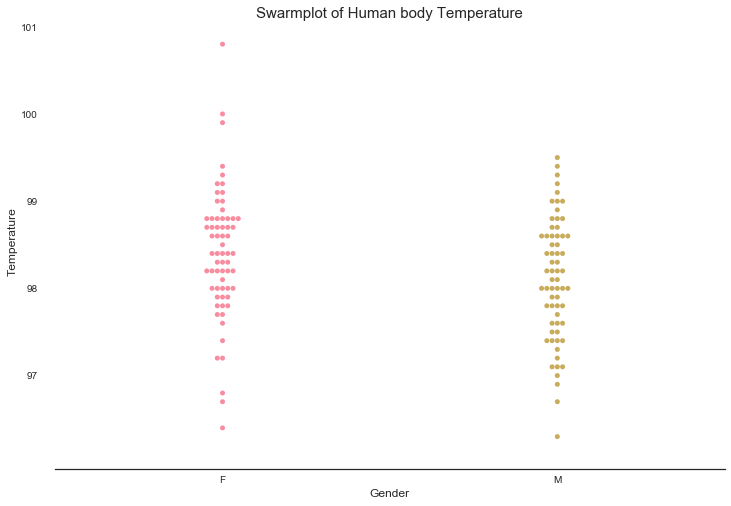

In [6]:
color = sns.color_palette()
sns.set(style="white")
#cnt_srs = df.gender.value_counts()

plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
 sns.swarmplot(y="temperature", x="gender", alpha=0.8, data =df)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.title('Swarmplot of Human body Temperature', fontsize=15)
plt.xticks(rotation='vertical')
sns.set_style("whitegrid")
sns.despine(offset=10)
sns.despine(left=True)

plt.show()

Fig 1(b) : The swarm plots of Temperature measurements indicate a higher mean for Females compared to Males

### Is the Data Normallly distributed ?
Given a sample set, one can compute the studentized residuals and compare these to the expected frequency: points that fall more than 3 standard deviations from the norm are likely outliers (unless the sample size is significantly large, by which point one expects a sample this extreme), and if there are many points more than 3 standard deviations from the norm, one likely has reason to question the assumed normality of the distribution. This holds ever more strongly for moves of 4 or more standard deviations.

The "68–95–99.7 rule" is often used to quickly get a rough probability estimate of something, given its standard deviation, if the population is assumed to be normal. It is also as a simple test for outliers if the population is assumed normal, and as a normality test if the population is potentially not normal.


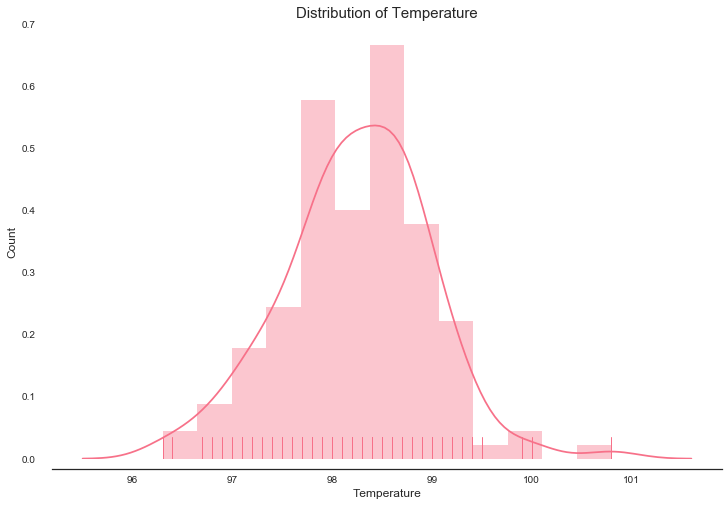

In [7]:
color = sns.color_palette()
sns.set(style="white")
#cnt_srs = df.gender.value_counts()

plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
 sns.distplot(df['temperature'], rug='True')
#plt.hist(df[temperature])
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Temperature', fontsize=15)
plt.xticks(rotation='vertical')
sns.set_style("whitegrid")
sns.despine(offset=10)
sns.despine(left=True)

plt.show()

Fig 2: (above) To get a rough idea if the data is normally distribued a plot of the distributions indicates a normal distribution with 2 peaks.

#### Does the 68–95–99.7 rule" hold ?

In [8]:
df_temp_mean = np.mean(df.temperature)
df_temp_sd = np.std(df.temperature)
print("The mean                   human temperature in the data set is {}".format(np.mean(df['temperature'])))
print("The standard deviation in  human temperature in the data set is {}".format(np.std(df['temperature'])))


temp_np_array = df.temperature.values

The mean                   human temperature in the data set is 98.24923076923078
The standard deviation in  human temperature in the data set is 0.7303577789050377


In [9]:
print('Number  of observations within three standard deviations of the mean:',
      len(temp_np_array[(temp_np_array >df_temp_mean-3*df_temp_sd) & (temp_np_array <df_temp_mean+3*df_temp_sd)]) )


print("Total number of observations is {}".format(len(df)))

print('Proportion of observations within three standard deviations of the mean:',
      len(temp_np_array[(temp_np_array>df_temp_mean-3*df_temp_sd) & (temp_np_array<df_temp_mean+3*df_temp_sd)])/len(temp_np_array))


Number  of observations within three standard deviations of the mean: 129
Total number of observations is 130
Proportion of observations within three standard deviations of the mean: 0.9923076923076923


Yes, the 68-95-99.7 rule holds.

 ### Are the observations in the sample independent ?

Two observations are independent if the occurrence of one observation provides no information about the occurrence of the other observation.  If the sample has observations measuring the temperature  of everyone  at a single point in time.  These should be unrelated observations.  However, if one were to measure one subject's temperature over time, these observations would be dependent because the temperature  at each time point would affect the temperature  at future time points depending on whether a patient is going into a fever, recovering from fever, has been given a fever-reducing medicine or is normal.
From  a temperature snapshot, the sample observations on Human temperature is independent
From the Heart Rate vs. Temperature point of view we see some correlation  see Fig 3 below.

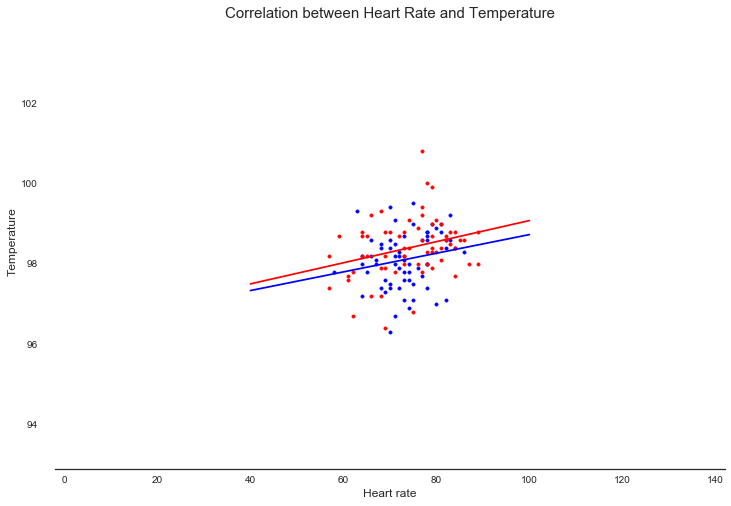

In [10]:
color = sns.color_palette()
sns.set(style="white")
#cnt_srs = df.gender.value_counts()

plt.figure(figsize=(12,8))
_ = plt.scatter(x=males_df['heart_rate'], y=males_df['temperature'], marker='.', color='blue')
_ = plt.scatter(x=females_df['heart_rate'], y=females_df['temperature'], marker='.', color='red')


_ = plt.xlabel('Heart rate', fontsize=12)
_ = plt.ylabel('Temperature', fontsize=12)
_ = plt.title('Correlation between Heart Rate and Temperature', fontsize=15)
_ = plt.xticks(rotation='vertical')

a_m, b_m = np.polyfit(males_df['heart_rate'],males_df['temperature'],1)
a_f, b_f = np.polyfit(females_df['heart_rate'],females_df['temperature'],1)


 
# Make theoretical line to plot
x = np.array([40,100])
y_m = a_m * x + b_m
y_f = a_f * x + b_f


# Add regression line to your plot
_ = plt.plot(x, y_m, color='blue')
 
_ = plt.plot(x, y_f, color='red')




plt.margins(0.7)
sns.set_style("whitegrid")
sns.despine(offset=10)
sns.despine(left=True)

plt.show()

Fig 3 : (above) There seems to be a positive correlation between heart_rate and temperature. The correlattion seems higher in females(red) than in males (blue)

In [11]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]


#### SUMMARY 
print("The pearson correlation of heart rate and  human temperature  in the data set is {}".format(pearson_r(df['heart_rate'],df['temperature'])))

print("The pearson correlation of heart rate and  human temperature  of Males in the data set is {}".format(pearson_r(males_df['heart_rate'],males_df['temperature'])))
print("The pearson correlation of heart rate and  human temperature  of Females in the data set is {}".format(pearson_r(females_df['heart_rate'],females_df['temperature'])))

The pearson correlation of heart rate and  human temperature  in the data set is 0.25365640272076423
The pearson correlation of heart rate and  human temperature  of Males in the data set is 0.195589375096875
The pearson correlation of heart rate and  human temperature  of Females in the data set is 0.2869311544971098


### Is the true population mean temperature 98.6 ?

###  3.1 : Bootstrap hypothesis

H0 : The null      hypothesis : The population mean temperature is 98.6F  (claim)

Ha : The alternate hypotheses : The population mean temperature differs from 98.6F F.

In [12]:
print("From the random sample of 130  human subjects we know:")
print (" a) the MEAN of the sample is        : {}".format(np.mean(df.temperature)))
print (" b) the STANDARD DEVIATION  of the sample is     : {}".format(np.std(df.temperature)))  
print (" c) the SAMPLE STANDARD ERROR  is : {}".format(np.std(df.temperature)/np.sqrt(len(df))))

From the random sample of 130  human subjects we know:
 a) the MEAN of the sample is        : 98.24923076923078
 b) the STANDARD DEVIATION  of the sample is     : 0.7303577789050377
 c) the SAMPLE STANDARD ERROR  is : 0.06405661469519336


In [13]:
# Here func can be any replicate mean, std etc
def bootstrap_replicate_1d(data, func, graph=0): 
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))  
    #print(bs_sample)
    
    if(graph==1):
        color = sns.color_palette()
        sns.set(style="white")
        #cnt_srs = df.gender.value_counts()

        plt.figure(figsize=(6,4))
        with sns.color_palette("husl"):
         sns.distplot(bs_sample, rug='True')
        #plt.hist(df[temperature])
        plt.xlabel('Temperature', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.title('Distribution of Temperaturemean is {}'.format(func(bs_sample), fontsize=15))
        plt.xticks(rotation='vertical')
        sns.set_style("whitegrid")
        sns.despine(offset=10)
        sns.despine(left=True)

        plt.show()
        print ("mean is {}".format(func(bs_sample)))
    return func(bs_sample)
      
## Create a function to draw the boot-strap samples
def draw_bs_reps(data, func, size=1, graph=0):
    bs_replicates = np.empty(size)
    for i in range(size):
            bs_replicates[i] = bootstrap_replicate_1d(data, func, graph)
            
    return bs_replicates
    

In [14]:
temp_np_array = np.array(df['temperature'])

bs_replicates  = draw_bs_reps(temp_np_array, np.mean, 10000, 0)

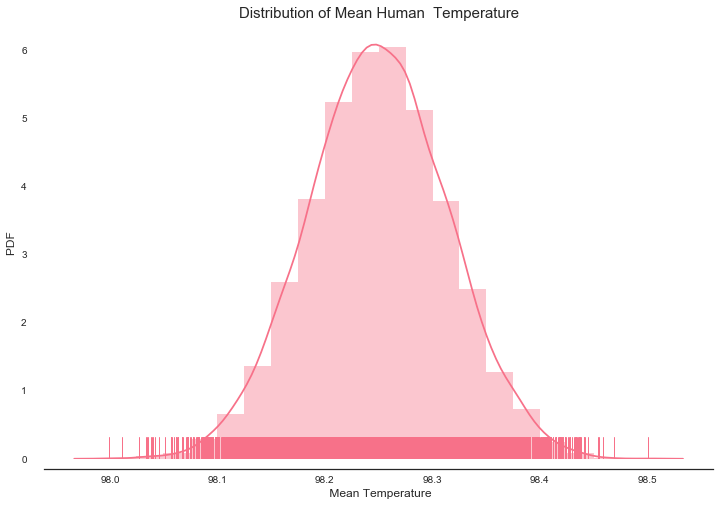

In [15]:
color = sns.color_palette()
sns.set(style="white")
#cnt_srs = df.gender.value_counts()

plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
 sns.distplot(bs_replicates, rug='True', bins=20)
#plt.hist(df[temperature])
plt.xlabel(' Mean Temperature', fontsize=12)
plt.ylabel('PDF ', fontsize=12)
plt.title('Distribution of Mean Human  Temperature', fontsize=15)
plt.xticks(rotation='vertical')
sns.set_style("whitegrid")
sns.despine(offset=10)
sns.despine(left=True)

plt.show()

In [16]:

# Compute the confidence interval
conf_int = np.percentile(bs_replicates,[2.5, 97.5])
# Print the confidence interval
print('95% confidence interval =', conf_int)



95% confidence interval = [ 98.12230769  98.37692308]


In [17]:
 # Compute fraction of replicates that are greater
#  
p = (np.sum(bs_replicates  > 98.6)) / len(bs_replicates)

# Print the p-value
print('p = ', p)

p =  0.0


 ####  Therefore we reject the claim that the the mean Human temperature is 98.6 in favor of the alternate hypothesis that the poulation mean differs from 98.6 F


#### Based on the 95% confidence interval, temperatures abobe 98.37 F are considered abnormal and temperatures below 98.12 F are considered abnormal

### 3.2 : Frequentist

One does not  know what the mean temperature is  is. However,   its value is fixed (not a random one). Therefore, one cannot assign probabilities to the mean being equal to a certain value, or being less than/greater than some other value. The most one  can do is collect data from a sample of the population and estimate its mean as the value which is most consistent with the data

For normally distributed data, it’s quite straightforward: the maximum likelihood estimate of the population mean is equal to the sample mean.

In [18]:
print("The mean human temperature in the data set is {}".format(np.mean(df['temperature'])))

print("Therefore we infer that the population mean is differs from 98.6 F")



The mean human temperature in the data set is 98.24923076923078
Therefore we infer that the population mean is differs from 98.6 F


### 3.3 : 1-sample or 2-sample test ?
 The 2-sample t-test takes a sample data from two groups and boils it down to the t-value.  For the estimation of mean Human temperature, 1-sample test should be used. For samples, involving two observations between intervening events on the same subject, one would use a 2-sample test.

### 3.3.1 1-sample test

One uses the 1-sample t-test to estimate the mean of a population and compare it to a target or reference value when one does not know the standard deviation of the population. Using this test, one can:
* Determine whether the mean of a group differs from a specified value.
* Calculate a range of values that is likely to include the population mean.



In [19]:
print("The sample_mean is {}".format(np.mean(df['temperature'])))
sample_mean = np.mean(df['temperature'])
print ("The null hypothesis value i.e  population mean temperature   is 98.6")
null_hyp_val = 98.6
print ("The sample_std_dev   is {}".format(np.std(df['temperature'])))
sample_std_dev = np.std(df['temperature'])
print( " ")
print ("The sample_std_error   is {}".format(np.std(df['temperature'])/np.sqrt(len(df))))
sample_std_error = np.std(df['temperature'])/np.sqrt(len(df))


The sample_mean is 98.24923076923078
The null hypothesis value i.e  population mean temperature   is 98.6
The sample_std_dev   is 0.7303577789050377
 
The sample_std_error   is 0.06405661469519336


In [20]:
t_z_stat = (sample_mean - null_hyp_val)/ (sample_std_error)

print( "The t-stat is : {}".format(t_z_stat))

The t-stat is : -5.475925202078116


#### t_stat of -5.47592 for 120 degrees for freedom  indicates that for a t-distribution,  the confidence is  way less than 0.005. Therefore, the difference between Null hypothesis value of 98.6F and sample mean is a true difference i.e. population mean temperature differs from 98.6

#### z_stat of -5.47592  for sample size N > 30 , we use z-stat. also indicates, p-value is nearly 0. Therefore we reject the Null hypothesis


### 3.3.2 In this situation, is it appropriate to use the  t or  z statistic?

In this situation, it is more appropriate for  the z statistic to be used, as the sample size N is 130 which is N >30.
For larger normally distributed samples, we use the z-statistic.


 
### 3.4 Is the result different ? 
No, the results are the same  - both reject the hypothesis

### 4. Draw a Sample of 10 and use the frequentist method

In [21]:
# Draw a sample of 10 from the sample of 130
# this is a better candidate for the t-test
import random 
indices = random.sample(range(len(df['temperature'])), 10)
temperature = df.temperature
temp_sample = []
for i in indices:
    temp_sample.append(temperature[i])

In [22]:
print("The sample_mean is {}".format(np.mean(temp_sample)))
sample_mean = np.mean(temp_sample)
print ("The null hypothesis value i.e  population mean temperature   is 98.6")
null_hyp_val = 98.6
print ("The sample_std_dev   is {}".format(np.std(temp_sample)))
sample_std_dev = np.std(temp_sample)
print( " ")
print ("The sample_std_error   is {}".format(np.std(temp_sample)/np.sqrt(len(temp_sample))))
sample_std_error = np.std(temp_sample)/np.sqrt(len(temp_sample))




The sample_mean is 98.21000000000001
The null hypothesis value i.e  population mean temperature   is 98.6
The sample_std_dev   is 0.5185556864985665
 
The sample_std_error   is 0.16398170629676945


In [23]:
t_z_stat = (sample_mean - null_hyp_val)/ (sample_std_error)

print( "The t-stat is : {}".format(t_z_stat))
print( "From the tables, this corresponds to about 27% percentile and we accept the claim that the mean  population human temperature is 98.6")
print( "From scipy stats, this corresponds to {} percentile ".format(t.cdf(t_z_stat,len(temp_sample))))

The t-stat is : -2.3783140742185926
From the tables, this corresponds to about 27% percentile and we accept the claim that the mean  population human temperature is 98.6
From scipy stats, this corresponds to 0.01936185922908817 percentile 


In [24]:
print( "The z-stat is : {}".format(t_z_stat))
print( "This corresponds to a probability of 0.2734 and we accept the claim that the mean  population human temperature is 98.6")
print( "From scipy stats, this corresponds to {} a probability  ".format(norm.cdf(t_z_stat)))


The z-stat is : -2.3783140742185926
This corresponds to a probability of 0.2734 and we accept the claim that the mean  population human temperature is 98.6
From scipy stats, this corresponds to 0.008696002626631031 a probability  


### From both these methods, for a smaller sample size of 10 ( vs. 130 previously ) we see the probability is favouring the claim is significant and we now accept the null Hypothesis that the population mean human temperature is 98.6 F"

## Is there a significant difference between males and females in normal temperature?


H0 : The human temperature of males in the population has an indentical poulation mean  as the human temperature of females in the population 

HA : The mean of human temperatures of the males differs from the female population
    


In [25]:
### Let us begin with the differences in the means of the original sample

np.mean(females_df['temperature']) - np.mean(males_df['temperature'])



0.289230769230727

In [26]:
# Let's re-shuffle the indices and draw a permutation of  130 samples

females_temp = females_df['temperature']
males_temp  = males_df['temperature']

# concatenate these together
temp_both = np.concatenate((females_temp, males_temp))

# create a permutation by shuffling them up 

temp_both_perm = np.random.permutation(temp_both)

perm_females_temp = temp_both_perm[:len(females_temp)]
perm_males_temp   = temp_both_perm[len(females_temp):]


# now calculate the difference in the mean 

np.mean(perm_females_temp) - np.mean(perm_males_temp)

-0.021538461538455067

#### Now we draw a histogram of differences in means of the Females and Males Human temperature

In [32]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [40]:
def permutation_sample(data_1, data_2):
    """ Permutation sample"""
    
    # concatenate 
    data_both = np.concatenate((data_1,data_2))
    temp_both_perm  = np.random.permutation(data_both)
    
    # create a permutation by shuffling them up
    return(temp_both_perm[:len(data_1)], temp_both_perm[len(data_1):])
    

In [46]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    data_both = np.empty(len(data_1) + len(data_2))

    for i in range(size):
        # Generate permutation sample
        
        #perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        data_both = np.concatenate((data_1,data_2))
        temp_both_perm  = np.random.permutation(data_both)
        
        # Compute the test statistic
        perm_replicates[i] = func(temp_both_perm[:len(data_1)],temp_both_perm[len(data_1):])

    return perm_replicates


In [48]:
perm_replicates = draw_perm_reps(females_temp, males_temp,
                                 diff_of_means, size=10000)

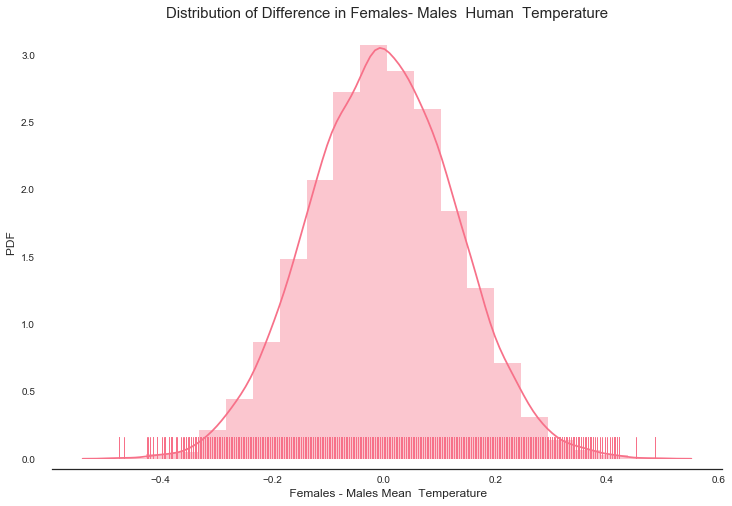

In [49]:
color = sns.color_palette()
sns.set(style="white")
#cnt_srs = df.gender.value_counts()

plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
 sns.distplot(perm_replicates, rug='True', bins=20)
#plt.hist(df[temperature])
plt.xlabel(' Females - Males Mean  Temperature', fontsize=12)
plt.ylabel('PDF ', fontsize=12)
plt.title('Distribution of Difference in Females- Males  Human  Temperature', fontsize=15)
plt.xticks(rotation='vertical')
sns.set_style("whitegrid")
sns.despine(offset=10)
sns.despine(left=True)

plt.show()

In [56]:
### Then we compute the p -value

In [57]:
# Compute fraction of replicates that are less than the observed difference in temperature between Females and Males: p
p  = np.sum(perm_replicates >= np.mean(females_df['temperature']) - np.mean(males_df['temperature'])) / 10000

In [58]:
# Print the p-value
print('p = ', p)


p =  0.0127


#### The high value of 0.0127  supports the claim that there is no difference in the mean temperature between females and males
